<br/>
<center>$Z= \vec{w} \cdot X + {b}$<center> <br/>

<img src="https://miro.medium.com/max/687/0*BcQ26EY75dXdztUF.png" align='center'>

<img src="https://miro.medium.com/max/2671/1*dx2AYvXVyPZ38TAiPeD9Aw.jpeg" align='center'>


Varios perceptrones apilados generan paredes ocultas, o bien, densas. 

En resumen, los bloques de una RNA son:

- Dense layer - a fully-connected layer, $f(X)=W \cdot X + \vec{b}$
- ReLU layer (or any other activation function to introduce non-linearity)
- Loss function - (crossentropy in case of multi-class classification problem)
- Backprop algorithm - a stochastic gradient descent with backpropageted gradients

In [61]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

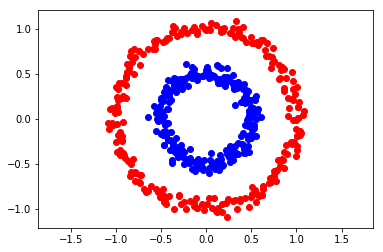

In [66]:
# CREAR EL DATASET

n = 500
p = 2

X,Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="red")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="blue")
plt.axis("equal")
plt.show()


In [27]:
class neural_layer():
 
  def __init__(self, n_conn, n_neur, act_f):
    
    self.act_f = act_f
    
    self.b = np.random.rand(1, n_neur)      * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1
    

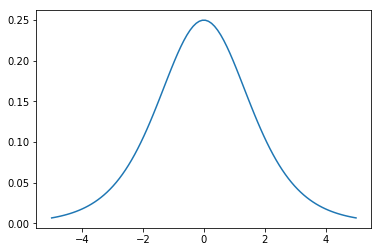

In [74]:
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
       lambda x: (1 / (1 + np.e ** (-x))*(1-(1 / (1 + np.e ** (-x))))))

#sigm = (lambda x: 1 / (1 + np.e ** (-x)),
#        lambda x: x * (1 - x))

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[1](_x))

#relu = ((lambda x: np.max(0,x)), (lambda x: np.max(0,x)/x))
#_y = np.linspace(-1, 1, 100)

#plt.plot(_y, relu[0](_y))



In [69]:
def create_nn(topology, act_f):
  
    nn = []
  
    for l, layer in enumerate(topology[:-1]):
    
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
    
    return nn

In [79]:
topology = [2, 8, 1]

neural_net = create_nn(topology, sigm)  

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))


def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
  
    out = [(None, X)]
  
    # Forward pass
    for l, layer in enumerate(neural_net):
  
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b
        a = neural_net[l].act_f[0](z)
  
        out.append((z, a))
    
  
    if train:
    
        # Backward pass 
        deltas = []
    
        for l in reversed(range(0, len(neural_net))):
      
            z = out[l+1][0]
            a = out[l+1][1]
            
#            _W = neural_net[l].W

            if l == len(neural_net) - 1:
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
            else:
                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
            
            _W = neural_net[l].W


            # Gradient descent
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr   
            neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
        
    return out[-1][1]
  
  
  

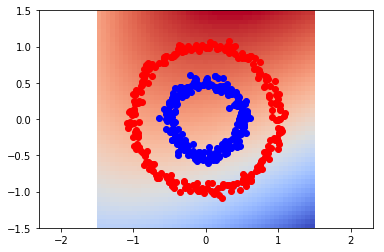

In [80]:
from IPython.display import clear_output
import time

neural_n = create_nn(topology, sigm)

loss = []

for i in range(5000):
    
  # Entrenemos a la red!
    pY = train(neural_n, X, Y, l2_cost, lr=0.5)
  
    if i % 100 == 0:
    
        print(pY)
  
        loss.append(l2_cost[0](pY, Y))
  
        res = 50

        _x0 = np.linspace(-1.5, 1.5, res)
        _x1 = np.linspace(-1.5, 1.5, res)

        _Y = np.zeros((res, res))

        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
        plt.axis("equal")

        plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="red")
        plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="blue")

        clear_output(wait=True)
        plt.show()
        #plt.plot(range(len(loss)), loss)
        #plt.show()
        time.sleep(0.5)  

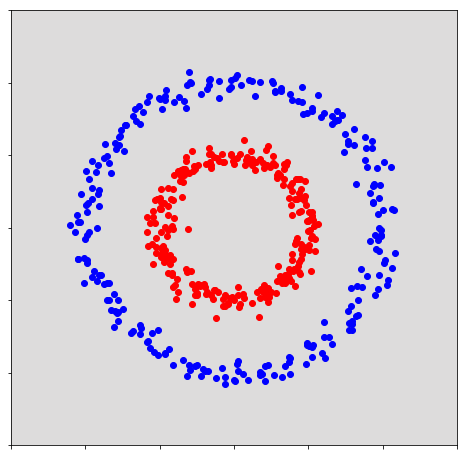

In [81]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar 
# dos anillos concéntricos de datos. 
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100 

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="blue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="red")

plt.tick_params(labelbottom=False, labelleft=False)

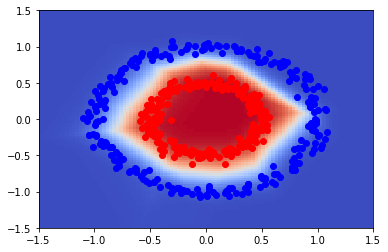

In [83]:
import tensorflow as tf

from matplotlib import animation
from IPython.core.display import display, HTML

# Definimos los puntos de entrada de la red, para la matriz X e Y.
iX = tf.placeholder('float', shape=[None, X.shape[1]])
iY = tf.placeholder('float', shape=[None])

lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')
b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

# Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')
b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

# Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')
b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

# Vector de predicciones de Y.
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]


# Evaluación de las predicciones.
loss = tf.losses.mean_squared_error(pY, iY)

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

n_steps = 1000 # Número de ciclos de entrenamiento.

iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

with tf.Session() as sess:
  
  # Inicializamos todos los parámetros de la red, las matrices W y b.
  sess.run(tf.global_variables_initializer())
    
  # Iteramos n pases de entrenamiento.
  for step in range(n_steps):
  
    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY. 
    # La evaluación del optimizer producirá el entrenamiento de la red.
    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })
    
    # Cada 25 iteraciones, imprimimos métricas.
    if step % 25 == 0: 
      
      # Cálculo del accuracy.
      acc = np.mean(np.round(_pY) == Y)
      
      # Impresión de métricas.
      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)
      
      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

      # Y lo guardamos para visualizar la animación.
      iPY.append(_pY)
      
  
# ----- CÓDIGO ANIMACIÓN ----- #

ims = []

fig = plt.figure(figsize=(10, 10))

print("--- Generando animación ---")

for fr in range(len(iPY)):
  
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

  # Visualización de la nube de datos.
  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="blue")
  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="red")

  clear_output(wait=True)
  plt.show()

## keras

In [84]:
import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.


# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

# Añadimos la capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['acc'])

# Y entrenamos al modelo. Los callbacks 
model.fit(X, Y, epochs=1000)

Epoch 1/1000
500/500 [==============================] - 0s 154us/sample - loss: 0.2498 - acc: 0.4960
Epoch 2/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.2491 - acc: 0.4960
Epoch 3/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.2484 - acc: 0.5000
Epoch 4/1000
500/500 [==============================] - 0s 29us/sample - loss: 0.2477 - acc: 0.4900
Epoch 5/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.2469 - acc: 0.5220
Epoch 6/1000
500/500 [==============================] - 0s 27us/sample - loss: 0.2461 - acc: 0.5300
Epoch 7/1000
500/500 [==============================] - 0s 28us/sample - loss: 0.2453 - acc: 0.5260
Epoch 8/1000
500/500 [==============================] - 0s 30us/sample - loss: 0.2445 - acc: 0.5420
Epoch 9/1000
500/500 [==============================] - 0s 28us/sample - loss: 0.2436 - acc: 0.5600
Epoch 10/1000
500/500 [==============================] - 0s 29us/sample - loss: 0.2428 - acc: 0.578

500/500 [==============================] - 0s 22us/sample - loss: 0.0060 - acc: 1.0000
Epoch 163/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0059 - acc: 1.0000
Epoch 164/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.0058 - acc: 1.0000
Epoch 165/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.0058 - acc: 1.0000
Epoch 166/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0057 - acc: 1.0000
Epoch 167/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0056 - acc: 1.0000
Epoch 168/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0055 - acc: 1.0000
Epoch 169/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0055 - acc: 1.0000
Epoch 170/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0054 - acc: 1.0000
Epoch 171/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0053 - acc: 1.

500/500 [==============================] - 0s 23us/sample - loss: 0.0016 - acc: 1.0000
Epoch 323/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0016 - acc: 1.0000
Epoch 324/1000
500/500 [==============================] - 0s 30us/sample - loss: 0.0016 - acc: 1.0000
Epoch 325/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0016 - acc: 1.0000
Epoch 326/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0016 - acc: 1.0000
Epoch 327/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0016 - acc: 1.0000
Epoch 328/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0016 - acc: 1.0000
Epoch 329/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0016 - acc: 1.0000
Epoch 330/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0016 - acc: 1.0000
Epoch 331/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0016 - acc: 1.

500/500 [==============================] - 0s 22us/sample - loss: 8.7347e-04 - acc: 1.0000
Epoch 481/1000
500/500 [==============================] - 0s 24us/sample - loss: 8.7093e-04 - acc: 1.0000
Epoch 482/1000
500/500 [==============================] - 0s 25us/sample - loss: 8.6804e-04 - acc: 1.0000
Epoch 483/1000
500/500 [==============================] - 0s 25us/sample - loss: 8.6601e-04 - acc: 1.0000
Epoch 484/1000
500/500 [==============================] - 0s 24us/sample - loss: 8.6248e-04 - acc: 1.0000
Epoch 485/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.6014e-04 - acc: 1.0000
Epoch 486/1000
500/500 [==============================] - 0s 23us/sample - loss: 8.5763e-04 - acc: 1.0000
Epoch 487/1000
500/500 [==============================] - 0s 23us/sample - loss: 8.5456e-04 - acc: 1.0000
Epoch 488/1000
500/500 [==============================] - 0s 23us/sample - loss: 8.5305e-04 - acc: 1.0000
Epoch 489/1000
500/500 [==============================] - 0s 

500/500 [==============================] - 0s 22us/sample - loss: 5.8637e-04 - acc: 1.0000
Epoch 635/1000
500/500 [==============================] - 0s 23us/sample - loss: 5.8491e-04 - acc: 1.0000
Epoch 636/1000
500/500 [==============================] - 0s 25us/sample - loss: 5.8385e-04 - acc: 1.0000
Epoch 637/1000
500/500 [==============================] - 0s 22us/sample - loss: 5.8243e-04 - acc: 1.0000
Epoch 638/1000
500/500 [==============================] - 0s 22us/sample - loss: 5.8117e-04 - acc: 1.0000
Epoch 639/1000
500/500 [==============================] - 0s 23us/sample - loss: 5.8019e-04 - acc: 1.0000
Epoch 640/1000
500/500 [==============================] - 0s 23us/sample - loss: 5.7881e-04 - acc: 1.0000
Epoch 641/1000
500/500 [==============================] - 0s 22us/sample - loss: 5.7737e-04 - acc: 1.0000
Epoch 642/1000
500/500 [==============================] - 0s 21us/sample - loss: 5.7637e-04 - acc: 1.0000
Epoch 643/1000
500/500 [==============================] - 0s 

500/500 [==============================] - 0s 23us/sample - loss: 4.3523e-04 - acc: 1.0000
Epoch 789/1000
500/500 [==============================] - 0s 23us/sample - loss: 4.3440e-04 - acc: 1.0000
Epoch 790/1000
500/500 [==============================] - 0s 25us/sample - loss: 4.3370e-04 - acc: 1.0000
Epoch 791/1000
500/500 [==============================] - 0s 22us/sample - loss: 4.3287e-04 - acc: 1.0000
Epoch 792/1000
500/500 [==============================] - 0s 22us/sample - loss: 4.3239e-04 - acc: 1.0000
Epoch 793/1000
500/500 [==============================] - 0s 23us/sample - loss: 4.3144e-04 - acc: 1.0000
Epoch 794/1000
500/500 [==============================] - 0s 22us/sample - loss: 4.3091e-04 - acc: 1.0000
Epoch 795/1000
500/500 [==============================] - 0s 24us/sample - loss: 4.2989e-04 - acc: 1.0000
Epoch 796/1000
500/500 [==============================] - 0s 23us/sample - loss: 4.2940e-04 - acc: 1.0000
Epoch 797/1000
500/500 [==============================] - 0s 

500/500 [==============================] - 0s 23us/sample - loss: 3.4308e-04 - acc: 1.0000
Epoch 943/1000
500/500 [==============================] - 0s 24us/sample - loss: 3.4263e-04 - acc: 1.0000
Epoch 944/1000
500/500 [==============================] - 0s 24us/sample - loss: 3.4208e-04 - acc: 1.0000
Epoch 945/1000
500/500 [==============================] - 0s 22us/sample - loss: 3.4164e-04 - acc: 1.0000
Epoch 946/1000
500/500 [==============================] - 0s 23us/sample - loss: 3.4124e-04 - acc: 1.0000
Epoch 947/1000
500/500 [==============================] - 0s 23us/sample - loss: 3.4070e-04 - acc: 1.0000
Epoch 948/1000
500/500 [==============================] - 0s 23us/sample - loss: 3.4013e-04 - acc: 1.0000
Epoch 949/1000
500/500 [==============================] - 0s 22us/sample - loss: 3.3974e-04 - acc: 1.0000
Epoch 950/1000
500/500 [==============================] - 0s 26us/sample - loss: 3.3926e-04 - acc: 1.0000
Epoch 951/1000
500/500 [==============================] - 0s 

# sklearn

In [85]:
import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Creamos el objeto del modelo de red neuronal multicapa.
clf = sk.neural_network.MLPRegressor(solver='sgd', 
                                     learning_rate_init=lr, 
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size = 64)


# Y lo entrenamos con nuestro datos.
clf.fit(X, Y)

Iteration 1, loss = 1.25078457
Iteration 2, loss = 0.44796063
Iteration 3, loss = 0.15770915
Iteration 4, loss = 0.13268748
Iteration 5, loss = 0.14343499
Iteration 6, loss = 0.13536686
Iteration 7, loss = 0.12823305
Iteration 8, loss = 0.12463069
Iteration 9, loss = 0.12531726
Iteration 10, loss = 0.12528388
Iteration 11, loss = 0.12518065
Iteration 12, loss = 0.12507918
Iteration 13, loss = 0.12502249
Iteration 14, loss = 0.12504353
Iteration 15, loss = 0.12509791
Iteration 16, loss = 0.12503991
Iteration 17, loss = 0.12509685
Iteration 18, loss = 0.12503950
Iteration 19, loss = 0.12503646
Iteration 20, loss = 0.12503110
Iteration 21, loss = 0.12507331
Iteration 22, loss = 0.12510861
Iteration 23, loss = 0.12503939
Iteration 24, loss = 0.12504153
Iteration 25, loss = 0.12507933
Iteration 26, loss = 0.12502504
Iteration 27, loss = 0.12507443
Iteration 28, loss = 0.12506249
Iteration 29, loss = 0.12514055
Iteration 30, loss = 0.12507339
Iteration 31, loss = 0.12514404
Iteration 32, los

/home/isidro/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size=64, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(16, 8, 1), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       n_iter_no_change=1000, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [60]:

Jupyter Notebook
abcRedes Last Checkpoint: hace 7 horas (unsaved changes) Current Kernel Logo 

Python 3

    File
    Edit
    View
    Insert
    Cell
    Kernel
    Widgets
    Help


𝑍=𝑤⃗ ⋅𝑋+𝑏

Varios perceptrones apilados generan paredes ocultas, o bien, densas.

En resumen, los bloques de una RNA son:

    Dense layer - a fully-connected layer, 𝑓(𝑋)=𝑊⋅𝑋+𝑏⃗ 

    ReLU layer (or any other activation function to introduce non-linearity)
    Loss function - (crossentropy in case of multi-class classification problem)
    Backprop algorithm - a stochastic gradient descent with backpropageted gradients

1

import numpy as np

2

import scipy as sc

3

import matplotlib.pyplot as plt

4

​

5

from sklearn.datasets import make_circles

1

# CREAR EL DATASET

2

​

3

n = 500

4

p = 2

5

​

6

X,Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

7

​

8

Y = Y[:, np.newaxis]

9

​

10

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="red")

11

plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="blue")

12

plt.axis("equal")

13

plt.show()

1

class neural_layer():

2

 

3

  def __init__(self, n_conn, n_neur, act_f):

4

    

5

    self.act_f = act_f

6

    

7

    self.b = np.random.rand(1, n_neur)      * 2 - 1

8

    self.W = np.random.rand(n_conn, n_neur) * 2 - 1

9

    

1

#sigm = (lambda x: 1 / (1 + np.e ** (-x)),

2

#        lambda x: (1 / (1 + np.e ** (-x))*(1-(1 / (1 + np.e ** (-x))))))

3

​

4

sigm = (lambda x: 1 / (1 + np.e ** (-x)),

5

        lambda x: x * (1 - x))

6

​

7

_x = np.linspace(-5, 5, 100)

8

plt.plot(_x, sigm[1](_x))

9

​

10

​

[<matplotlib.lines.Line2D at 0x7fe824fa7d30>]

1

def create_nn(topology, act_f):

2

  

3

    nn = []

4

  

5

    for l, layer in enumerate(topology[:-1]):

6

    

7

        nn.append(neural_layer(topology[l], topology[l+1], act_f))

8

    

9

    return nn

1

topology = [2, 8, 2, 8, 1]

2

​

3

neural_net = create_nn(topology, sigm)  

4

​

5

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),

6

           lambda Yp, Yr: (Yp - Yr))

7

​

8

​

9

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):

10

  

11

    out = [(None, X)]

12

  

13

    # Forward pass

14

    for l, layer in enumerate(neural_net):

15

  

16

        z = out[-1][1] @ neural_net[l].W + neural_net[l].b

17

        a = neural_net[l].act_f[0](z)

18

  

19

        out.append((z, a))

20

    

21

  

22

    if train:

23

    

24

        # Backward pass 

25

        deltas = []

26

    

27

        for l in reversed(range(0, len(neural_net))):

28

      

29

            z = out[l+1][0]

30

            a = out[l+1][1]

31

            

32

#            _W = neural_net[l].W

33

​

34

            if l == len(neural_net) - 1:

35

                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))

36

            else:

37

                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

38

            

39

            _W = neural_net[l].W

40

​

41

​

42

            # Gradient descent

43

            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr   

44

            neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

45

        

46

    return out[-1][1]

47

  

48

  

49

  

1

from IPython.display import clear_output

2

import time

3

​

4

neural_n = create_nn(topology, sigm)

5

​

6

loss = []

7

​

8

for i in range(5000):

9

    

10

  # Entrenemos a la red!

11

    pY = train(neural_n, X, Y, l2_cost, lr=0.5)

12

  

13

    if i % 100 == 0:

14

    

15

        print(pY)

16

  

17

        loss.append(l2_cost[0](pY, Y))

18

  

19

        res = 50

20

​

21

        _x0 = np.linspace(-1.5, 1.5, res)

22

        _x1 = np.linspace(-1.5, 1.5, res)

23

​

24

        _Y = np.zeros((res, res))

25

​

26

        for i0, x0 in enumerate(_x0):

27

            for i1, x1 in enumerate(_x1):

28

                _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

29

​

30

        plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")

31

        plt.axis("equal")

32

​

33

        plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="red")

34

        plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="blue")

35

​

36

        clear_output(wait=True)

37

        plt.show()

38

        #plt.plot(range(len(loss)), loss)

39

        #plt.show()

40

        time.sleep(0.5)  

1

import numpy as np

2

import scipy as sc

3

import matplotlib.pyplot as plt

4

​

5

from sklearn.datasets import make_circles

6

​

7

# Creamos nuestros datos artificiales, donde buscaremos clasificar 

8

# dos anillos concéntricos de datos. 

9

X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

10

​

11

# Resolución del mapa de predicción.

12

res = 100 

13

​

14

# Coordendadas del mapa de predicción.

15

_x0 = np.linspace(-1.5, 1.5, res)

16

_x1 = np.linspace(-1.5, 1.5, res)

17

​

18

# Input con cada combo de coordenadas del mapa de predicción.

19

_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

20

​

21

# Objeto vacio a 0.5 del mapa de predicción.

22

_pY = np.zeros((res, res)) + 0.5

23

​

24

# Visualización del mapa de predicción.

25

plt.figure(figsize=(8, 8))

26

plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

27

​

28

# Visualización de la nube de datos.

29

plt.scatter(X[Y == 0,0], X[Y == 0,1], c="blue")

30

plt.scatter(X[Y == 1,0], X[Y == 1,1], c="red")

31

​

32

plt.tick_params(labelbottom=False, labelleft=False)

1

import tensorflow as tf

2

​

3

from matplotlib import animation

4

from IPython.core.display import display, HTML

5

​

6

# Definimos los puntos de entrada de la red, para la matriz X e Y.

7

iX = tf.placeholder('float', shape=[None, X.shape[1]])

8

iY = tf.placeholder('float', shape=[None])

9

​

10

lr = 0.01           # learning rate

11

nn = [2, 16, 8, 1]  # número de neuronas por capa.

12

​

13

# Capa 1

14

W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name='Weights_1')

15

b1 = tf.Variable(tf.random_normal([nn[1]]), name='bias_1')

16

​

17

l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

18

​

19

# Capa 2

20

W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name='Weights_2')

21

b2 = tf.Variable(tf.random_normal([nn[2]]), name='bias_2')

22

​

23

l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

24

​

25

# Capa 3

26

W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name='Weights_3')

27

b3 = tf.Variable(tf.random_normal([nn[3]]), name='bias_3')

28

​

29

# Vector de predicciones de Y.

30

pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:, 0]

31

​

32

​

33

# Evaluación de las predicciones.

34

loss = tf.losses.mean_squared_error(pY, iY)

35

​

36

# Definimos al optimizador de la red, para que minimice el error.

37

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)

38

​

39

n_steps = 1000 # Número de ciclos de entrenamiento.

40

​

41

iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

42

​

43

with tf.Session() as sess:

44

  

45

  # Inicializamos todos los parámetros de la red, las matrices W y b.

46

  sess.run(tf.global_variables_initializer())

47

    

48

  # Iteramos n pases de entrenamiento.

49

  for step in range(n_steps):

50

  

51

    # Evaluamos al optimizador, a la función de coste y al tensor de salida pY. 

52

    # La evaluación del optimizer producirá el entrenamiento de la red.

53

    _, _loss, _pY = sess.run([optimizer, loss, pY], feed_dict={ iX : X, iY : Y })

54

    

55

    # Cada 25 iteraciones, imprimimos métricas.

56

    if step % 25 == 0: 

57

      

58

      # Cálculo del accuracy.

59

      acc = np.mean(np.round(_pY) == Y)

60

      

61

      # Impresión de métricas.

62

      print('Step', step, '/', n_steps, '- Loss = ', _loss, '- Acc =', acc)

63

      

64

      # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.

65

      _pY = sess.run(pY, feed_dict={ iX : _pX }).reshape((res, res))

66

​

67

      # Y lo guardamos para visualizar la animación.

68

      iPY.append(_pY)

69

      

70

  

71

# ----- CÓDIGO ANIMACIÓN ----- #

72

​

73

ims = []

74

​

75

fig = plt.figure(figsize=(10, 10))

76

​

77

print("--- Generando animación ---")

78

​

79

for fr in range(len(iPY)):

80

  

81

  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)

82

​

83

  # Visualización de la nube de datos.

84

  plt.scatter(X[Y == 0,0], X[Y == 0,1], c="blue")

85

  plt.scatter(X[Y == 1,0], X[Y == 1,1], c="red")

86

​

87

  clear_output(wait=True)

88

  plt.show()

keras
1

import tensorflow as tf

2

import tensorflow.keras as kr

3

​

4

from IPython.core.display import display, HTML

5

​

6

​

7

lr = 0.01           # learning rate

8

nn = [2, 16, 8, 1]  # número de neuronas por capa.

9

​

10

​

11

# Creamos el objeto que contendrá a nuestra red neuronal, como

12

# secuencia de capas.

13

model = kr.Sequential()

14

​

15

# Añadimos la capa 1

16

l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

17

​

18

# Añadimos la capa 2

19

l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

20

​

21

# Añadimos la capa 3

22

l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

23

​

24

# Compilamos el modelo, definiendo la función de coste y el optimizador.

25

model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['acc'])

26

​

27

# Y entrenamos al modelo. Los callbacks 

28

model.fit(X, Y, epochs=1000)

WARNING:tensorflow:From /home/isidro/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
WARNING:tensorflow:From /home/isidro/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/utils/losses_utils.py:170: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
WARNING:tensorflow:From /home/isidro/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
500/500 [==============================] - 0s 678us/sample - loss: 0.2330 - acc: 0.5000
Epoch 2/1000
500/500 [==============================] - 0s 35us/sample - loss: 0.2305 - acc: 0.5200
Epoch 3/1000
500/500 [==============================] - 0s 27us/sample - loss: 0.2286 - acc: 0.5880
Epoch 4/1000
500/500 [==============================] - 0s 28us/sample - loss: 0.2270 - acc: 0.6200
Epoch 5/1000
500/500 [==============================] - 0s 29us/sample - loss: 0.2253 - acc: 0.6600
Epoch 6/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.2237 - acc: 0.6720
Epoch 7/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.2222 - acc: 0.6940
Epoch 8/1000
500/500 [==============================] - 0s 27us/sample - loss: 0.2204 - acc: 0.7500
Epoch 9/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.2188 - acc: 0.7580
Epoch 10/1000
500/500 [==============================] - 0s 27us/sample - loss: 0.2172 - acc: 0.7640
Epoch 11/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.2154 - acc: 0.7880
Epoch 12/1000
500/500 [==============================] - 0s 27us/sample - loss: 0.2136 - acc: 0.8000
Epoch 13/1000
500/500 [==============================] - 0s 29us/sample - loss: 0.2117 - acc: 0.8000
Epoch 14/1000
500/500 [==============================] - 0s 27us/sample - loss: 0.2097 - acc: 0.8380
Epoch 15/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.2077 - acc: 0.8480
Epoch 16/1000
500/500 [==============================] - 0s 28us/sample - loss: 0.2056 - acc: 0.8500
Epoch 17/1000
500/500 [==============================] - 0s 27us/sample - loss: 0.2034 - acc: 0.8640
Epoch 18/1000
500/500 [==============================] - 0s 32us/sample - loss: 0.2012 - acc: 0.8880
Epoch 19/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.1989 - acc: 0.8920
Epoch 20/1000
500/500 [==============================] - 0s 28us/sample - loss: 0.1963 - acc: 0.9100
Epoch 21/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.1937 - acc: 0.9180
Epoch 22/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.1909 - acc: 0.9480
Epoch 23/1000
500/500 [==============================] - 0s 31us/sample - loss: 0.1880 - acc: 0.9540
Epoch 24/1000
500/500 [==============================] - 0s 29us/sample - loss: 0.1850 - acc: 0.9660
Epoch 25/1000
500/500 [==============================] - 0s 32us/sample - loss: 0.1818 - acc: 0.9700
Epoch 26/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.1785 - acc: 0.9720
Epoch 27/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.1752 - acc: 0.9780
Epoch 28/1000
500/500 [==============================] - 0s 31us/sample - loss: 0.1717 - acc: 0.9900
Epoch 29/1000
500/500 [==============================] - 0s 38us/sample - loss: 0.1682 - acc: 0.9920
Epoch 30/1000
500/500 [==============================] - 0s 27us/sample - loss: 0.1647 - acc: 0.9940
Epoch 31/1000
500/500 [==============================] - 0s 28us/sample - loss: 0.1613 - acc: 0.9960
Epoch 32/1000
500/500 [==============================] - 0s 27us/sample - loss: 0.1577 - acc: 0.9960
Epoch 33/1000
500/500 [==============================] - 0s 30us/sample - loss: 0.1545 - acc: 0.9960
Epoch 34/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.1507 - acc: 0.9980
Epoch 35/1000
500/500 [==============================] - 0s 27us/sample - loss: 0.1470 - acc: 0.9980
Epoch 36/1000
500/500 [==============================] - 0s 29us/sample - loss: 0.1434 - acc: 0.9980
Epoch 37/1000
500/500 [==============================] - 0s 29us/sample - loss: 0.1398 - acc: 0.9980
Epoch 38/1000
500/500 [==============================] - 0s 29us/sample - loss: 0.1359 - acc: 0.9980
Epoch 39/1000
500/500 [==============================] - 0s 28us/sample - loss: 0.1324 - acc: 0.9980
Epoch 40/1000
500/500 [==============================] - 0s 28us/sample - loss: 0.1286 - acc: 0.9980
Epoch 41/1000
500/500 [==============================] - 0s 27us/sample - loss: 0.1248 - acc: 0.9980
Epoch 42/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.1211 - acc: 1.0000
Epoch 43/1000
500/500 [==============================] - 0s 29us/sample - loss: 0.1175 - acc: 1.0000
Epoch 44/1000
500/500 [==============================] - 0s 29us/sample - loss: 0.1138 - acc: 1.0000
Epoch 45/1000
500/500 [==============================] - 0s 27us/sample - loss: 0.1102 - acc: 1.0000
Epoch 46/1000
500/500 [==============================] - 0s 31us/sample - loss: 0.1066 - acc: 1.0000
Epoch 47/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.1032 - acc: 1.0000
Epoch 48/1000
500/500 [==============================] - 0s 27us/sample - loss: 0.0996 - acc: 1.0000
Epoch 49/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0964 - acc: 1.0000
Epoch 50/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0931 - acc: 1.0000
Epoch 51/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0899 - acc: 1.0000
Epoch 52/1000
500/500 [==============================] - 0s 27us/sample - loss: 0.0869 - acc: 1.0000
Epoch 53/1000
500/500 [==============================] - 0s 27us/sample - loss: 0.0838 - acc: 1.0000
Epoch 54/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0809 - acc: 1.0000
Epoch 55/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0780 - acc: 1.0000
Epoch 56/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0754 - acc: 1.0000
Epoch 57/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0726 - acc: 1.0000
Epoch 58/1000
500/500 [==============================] - 0s 27us/sample - loss: 0.0700 - acc: 1.0000
Epoch 59/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0676 - acc: 1.0000
Epoch 60/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0652 - acc: 1.0000
Epoch 61/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0630 - acc: 1.0000
Epoch 62/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0608 - acc: 1.0000
Epoch 63/1000
500/500 [==============================] - 0s 27us/sample - loss: 0.0587 - acc: 1.0000
Epoch 64/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.0567 - acc: 1.0000
Epoch 65/1000
500/500 [==============================] - 0s 28us/sample - loss: 0.0548 - acc: 1.0000
Epoch 66/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0529 - acc: 1.0000
Epoch 67/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0512 - acc: 1.0000
Epoch 68/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0496 - acc: 1.0000
Epoch 69/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0480 - acc: 1.0000
Epoch 70/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.0464 - acc: 1.0000
Epoch 71/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0450 - acc: 1.0000
Epoch 72/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0436 - acc: 1.0000
Epoch 73/1000

500/500 [==============================] - 0s 22us/sample - loss: 0.0423 - acc: 1.0000
Epoch 74/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0411 - acc: 1.0000
Epoch 75/1000
500/500 [==============================] - 0s 29us/sample - loss: 0.0398 - acc: 1.0000
Epoch 76/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0386 - acc: 1.0000
Epoch 77/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0376 - acc: 1.0000
Epoch 78/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0365 - acc: 1.0000
Epoch 79/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0354 - acc: 1.0000
Epoch 80/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0345 - acc: 1.0000
Epoch 81/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0335 - acc: 1.0000
Epoch 82/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0326 - acc: 1.0000
Epoch 83/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0318 - acc: 1.0000
Epoch 84/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0309 - acc: 1.0000
Epoch 85/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0302 - acc: 1.0000
Epoch 86/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0294 - acc: 1.0000
Epoch 87/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0287 - acc: 1.0000
Epoch 88/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0279 - acc: 1.0000
Epoch 89/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0273 - acc: 1.0000
Epoch 90/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0266 - acc: 1.0000
Epoch 91/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0260 - acc: 1.0000
Epoch 92/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0254 - acc: 1.0000
Epoch 93/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0248 - acc: 1.0000
Epoch 94/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0242 - acc: 1.0000
Epoch 95/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0237 - acc: 1.0000
Epoch 96/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0232 - acc: 1.0000
Epoch 97/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0227 - acc: 1.0000
Epoch 98/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0222 - acc: 1.0000
Epoch 99/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0217 - acc: 1.0000
Epoch 100/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0213 - acc: 1.0000
Epoch 101/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0208 - acc: 1.0000
Epoch 102/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0204 - acc: 1.0000
Epoch 103/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0200 - acc: 1.0000
Epoch 104/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0196 - acc: 1.0000
Epoch 105/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0192 - acc: 1.0000
Epoch 106/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0188 - acc: 1.0000
Epoch 107/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0185 - acc: 1.0000
Epoch 108/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0181 - acc: 1.0000
Epoch 109/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0178 - acc: 1.0000
Epoch 110/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0174 - acc: 1.0000
Epoch 111/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0171 - acc: 1.0000
Epoch 112/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0168 - acc: 1.0000
Epoch 113/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0165 - acc: 1.0000
Epoch 114/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0162 - acc: 1.0000
Epoch 115/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0160 - acc: 1.0000
Epoch 116/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0157 - acc: 1.0000
Epoch 117/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0154 - acc: 1.0000
Epoch 118/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0152 - acc: 1.0000
Epoch 119/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0149 - acc: 1.0000
Epoch 120/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0147 - acc: 1.0000
Epoch 121/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0144 - acc: 1.0000
Epoch 122/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0142 - acc: 1.0000
Epoch 123/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0140 - acc: 1.0000
Epoch 124/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0138 - acc: 1.0000
Epoch 125/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0135 - acc: 1.0000
Epoch 126/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0133 - acc: 1.0000
Epoch 127/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0131 - acc: 1.0000
Epoch 128/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0129 - acc: 1.0000
Epoch 129/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0128 - acc: 1.0000
Epoch 130/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0126 - acc: 1.0000
Epoch 131/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0124 - acc: 1.0000
Epoch 132/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0122 - acc: 1.0000
Epoch 133/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0120 - acc: 1.0000
Epoch 134/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0119 - acc: 1.0000
Epoch 135/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.0117 - acc: 1.0000
Epoch 136/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0115 - acc: 1.0000
Epoch 137/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0114 - acc: 1.0000
Epoch 138/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0112 - acc: 1.0000
Epoch 139/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0111 - acc: 1.0000
Epoch 140/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0109 - acc: 1.0000
Epoch 141/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0108 - acc: 1.0000
Epoch 142/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0106 - acc: 1.0000
Epoch 143/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0105 - acc: 1.0000
Epoch 144/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0104 - acc: 1.0000
Epoch 145/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0102 - acc: 1.0000
Epoch 146/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0101 - acc: 1.0000
Epoch 147/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0100 - acc: 1.0000
Epoch 148/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0099 - acc: 1.0000
Epoch 149/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0097 - acc: 1.0000
Epoch 150/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0096 - acc: 1.0000
Epoch 151/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0095 - acc: 1.0000
Epoch 152/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0094 - acc: 1.0000
Epoch 153/1000

500/500 [==============================] - 0s 24us/sample - loss: 0.0093 - acc: 1.0000
Epoch 154/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0092 - acc: 1.0000
Epoch 155/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0091 - acc: 1.0000
Epoch 156/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0090 - acc: 1.0000
Epoch 157/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0089 - acc: 1.0000
Epoch 158/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0088 - acc: 1.0000
Epoch 159/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0087 - acc: 1.0000
Epoch 160/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0086 - acc: 1.0000
Epoch 161/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0085 - acc: 1.0000
Epoch 162/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0084 - acc: 1.0000
Epoch 163/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0083 - acc: 1.0000
Epoch 164/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0082 - acc: 1.0000
Epoch 165/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0081 - acc: 1.0000
Epoch 166/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0080 - acc: 1.0000
Epoch 167/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0079 - acc: 1.0000
Epoch 168/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0079 - acc: 1.0000
Epoch 169/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0078 - acc: 1.0000
Epoch 170/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0077 - acc: 1.0000
Epoch 171/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0076 - acc: 1.0000
Epoch 172/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0075 - acc: 1.0000
Epoch 173/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0075 - acc: 1.0000
Epoch 174/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0074 - acc: 1.0000
Epoch 175/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0073 - acc: 1.0000
Epoch 176/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0073 - acc: 1.0000
Epoch 177/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0072 - acc: 1.0000
Epoch 178/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0071 - acc: 1.0000
Epoch 179/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0070 - acc: 1.0000
Epoch 180/1000
500/500 [==============================] - 0s 20us/sample - loss: 0.0070 - acc: 1.0000
Epoch 181/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0069 - acc: 1.0000
Epoch 182/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0068 - acc: 1.0000
Epoch 183/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0068 - acc: 1.0000
Epoch 184/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0067 - acc: 1.0000
Epoch 185/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0067 - acc: 1.0000
Epoch 186/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0066 - acc: 1.0000
Epoch 187/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0065 - acc: 1.0000
Epoch 188/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0065 - acc: 1.0000
Epoch 189/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0064 - acc: 1.0000
Epoch 190/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0064 - acc: 1.0000
Epoch 191/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0063 - acc: 1.0000
Epoch 192/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0063 - acc: 1.0000
Epoch 193/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0062 - acc: 1.0000
Epoch 194/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0062 - acc: 1.0000
Epoch 195/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0061 - acc: 1.0000
Epoch 196/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0061 - acc: 1.0000
Epoch 197/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0060 - acc: 1.0000
Epoch 198/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0060 - acc: 1.0000
Epoch 199/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0059 - acc: 1.0000
Epoch 200/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0059 - acc: 1.0000
Epoch 201/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0058 - acc: 1.0000
Epoch 202/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0058 - acc: 1.0000
Epoch 203/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0057 - acc: 1.0000
Epoch 204/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0057 - acc: 1.0000
Epoch 205/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0056 - acc: 1.0000
Epoch 206/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0056 - acc: 1.0000
Epoch 207/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0055 - acc: 1.0000
Epoch 208/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0055 - acc: 1.0000
Epoch 209/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0054 - acc: 1.0000
Epoch 210/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0054 - acc: 1.0000
Epoch 211/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0054 - acc: 1.0000
Epoch 212/1000
500/500 [==============================] - 0s 30us/sample - loss: 0.0053 - acc: 1.0000
Epoch 213/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0053 - acc: 1.0000
Epoch 214/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0052 - acc: 1.0000
Epoch 215/1000
500/500 [==============================] - 0s 27us/sample - loss: 0.0052 - acc: 1.0000
Epoch 216/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0052 - acc: 1.0000
Epoch 217/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.0051 - acc: 1.0000
Epoch 218/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0051 - acc: 1.0000
Epoch 219/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0051 - acc: 1.0000
Epoch 220/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0050 - acc: 1.0000
Epoch 221/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0050 - acc: 1.0000
Epoch 222/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0049 - acc: 1.0000
Epoch 223/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0049 - acc: 1.0000
Epoch 224/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0049 - acc: 1.0000
Epoch 225/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0048 - acc: 1.0000
Epoch 226/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0048 - acc: 1.0000
Epoch 227/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0048 - acc: 1.0000
Epoch 228/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0047 - acc: 1.0000
Epoch 229/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0047 - acc: 1.0000
Epoch 230/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0047 - acc: 1.0000
Epoch 231/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0046 - acc: 1.0000
Epoch 232/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0046 - acc: 1.0000
Epoch 233/1000

500/500 [==============================] - 0s 22us/sample - loss: 0.0046 - acc: 1.0000
Epoch 234/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0046 - acc: 1.0000
Epoch 235/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0045 - acc: 1.0000
Epoch 236/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0045 - acc: 1.0000
Epoch 237/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0045 - acc: 1.0000
Epoch 238/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0044 - acc: 1.0000
Epoch 239/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0044 - acc: 1.0000
Epoch 240/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0044 - acc: 1.0000
Epoch 241/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0043 - acc: 1.0000
Epoch 242/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0043 - acc: 1.0000
Epoch 243/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0043 - acc: 1.0000
Epoch 244/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0043 - acc: 1.0000
Epoch 245/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0042 - acc: 1.0000
Epoch 246/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0042 - acc: 1.0000
Epoch 247/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0042 - acc: 1.0000
Epoch 248/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0042 - acc: 1.0000
Epoch 249/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0041 - acc: 1.0000
Epoch 250/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0041 - acc: 1.0000
Epoch 251/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0041 - acc: 1.0000
Epoch 252/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0041 - acc: 1.0000
Epoch 253/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0040 - acc: 1.0000
Epoch 254/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0040 - acc: 1.0000
Epoch 255/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0040 - acc: 1.0000
Epoch 256/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0040 - acc: 1.0000
Epoch 257/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0039 - acc: 1.0000
Epoch 258/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0039 - acc: 1.0000
Epoch 259/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0039 - acc: 1.0000
Epoch 260/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0039 - acc: 1.0000
Epoch 261/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0038 - acc: 1.0000
Epoch 262/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0038 - acc: 1.0000
Epoch 263/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0038 - acc: 1.0000
Epoch 264/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0038 - acc: 1.0000
Epoch 265/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0038 - acc: 1.0000
Epoch 266/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0037 - acc: 1.0000
Epoch 267/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0037 - acc: 1.0000
Epoch 268/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.0037 - acc: 1.0000
Epoch 269/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0037 - acc: 1.0000
Epoch 270/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0037 - acc: 1.0000
Epoch 271/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0036 - acc: 1.0000
Epoch 272/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0036 - acc: 1.0000
Epoch 273/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0036 - acc: 1.0000
Epoch 274/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0036 - acc: 1.0000
Epoch 275/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0036 - acc: 1.0000
Epoch 276/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0035 - acc: 1.0000
Epoch 277/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0035 - acc: 1.0000
Epoch 278/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0035 - acc: 1.0000
Epoch 279/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0035 - acc: 1.0000
Epoch 280/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0035 - acc: 1.0000
Epoch 281/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0034 - acc: 1.0000
Epoch 282/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0034 - acc: 1.0000
Epoch 283/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0034 - acc: 1.0000
Epoch 284/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0034 - acc: 1.0000
Epoch 285/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0034 - acc: 1.0000
Epoch 286/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0034 - acc: 1.0000
Epoch 287/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0033 - acc: 1.0000
Epoch 288/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0033 - acc: 1.0000
Epoch 289/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0033 - acc: 1.0000
Epoch 290/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0033 - acc: 1.0000
Epoch 291/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0033 - acc: 1.0000
Epoch 292/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0033 - acc: 1.0000
Epoch 293/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0032 - acc: 1.0000
Epoch 294/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0032 - acc: 1.0000
Epoch 295/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0032 - acc: 1.0000
Epoch 296/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0032 - acc: 1.0000
Epoch 297/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0032 - acc: 1.0000
Epoch 298/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0032 - acc: 1.0000
Epoch 299/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0031 - acc: 1.0000
Epoch 300/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0031 - acc: 1.0000
Epoch 301/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0031 - acc: 1.0000
Epoch 302/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0031 - acc: 1.0000
Epoch 303/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0031 - acc: 1.0000
Epoch 304/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0031 - acc: 1.0000
Epoch 305/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0031 - acc: 1.0000
Epoch 306/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0030 - acc: 1.0000
Epoch 307/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0030 - acc: 1.0000
Epoch 308/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0030 - acc: 1.0000
Epoch 309/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0030 - acc: 1.0000
Epoch 310/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0030 - acc: 1.0000
Epoch 311/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0030 - acc: 1.0000
Epoch 312/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0030 - acc: 1.0000
Epoch 313/1000

500/500 [==============================] - 0s 22us/sample - loss: 0.0029 - acc: 1.0000
Epoch 314/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0029 - acc: 1.0000
Epoch 315/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0029 - acc: 1.0000
Epoch 316/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0029 - acc: 1.0000
Epoch 317/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0029 - acc: 1.0000
Epoch 318/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0029 - acc: 1.0000
Epoch 319/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0029 - acc: 1.0000
Epoch 320/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0028 - acc: 1.0000
Epoch 321/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0028 - acc: 1.0000
Epoch 322/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0028 - acc: 1.0000
Epoch 323/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0028 - acc: 1.0000
Epoch 324/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0028 - acc: 1.0000
Epoch 325/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0028 - acc: 1.0000
Epoch 326/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0028 - acc: 1.0000
Epoch 327/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0028 - acc: 1.0000
Epoch 328/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0028 - acc: 1.0000
Epoch 329/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0027 - acc: 1.0000
Epoch 330/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0027 - acc: 1.0000
Epoch 331/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0027 - acc: 1.0000
Epoch 332/1000
500/500 [==============================] - 0s 20us/sample - loss: 0.0027 - acc: 1.0000
Epoch 333/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0027 - acc: 1.0000
Epoch 334/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0027 - acc: 1.0000
Epoch 335/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0027 - acc: 1.0000
Epoch 336/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0027 - acc: 1.0000
Epoch 337/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0026 - acc: 1.0000
Epoch 338/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0026 - acc: 1.0000
Epoch 339/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0026 - acc: 1.0000
Epoch 340/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0026 - acc: 1.0000
Epoch 341/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0026 - acc: 1.0000
Epoch 342/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0026 - acc: 1.0000
Epoch 343/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0026 - acc: 1.0000
Epoch 344/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0026 - acc: 1.0000
Epoch 345/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0026 - acc: 1.0000
Epoch 346/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0026 - acc: 1.0000
Epoch 347/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0025 - acc: 1.0000
Epoch 348/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0025 - acc: 1.0000
Epoch 349/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0025 - acc: 1.0000
Epoch 350/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0025 - acc: 1.0000
Epoch 351/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0025 - acc: 1.0000
Epoch 352/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0025 - acc: 1.0000
Epoch 353/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0025 - acc: 1.0000
Epoch 354/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0025 - acc: 1.0000
Epoch 355/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0025 - acc: 1.0000
Epoch 356/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0025 - acc: 1.0000
Epoch 357/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0024 - acc: 1.0000
Epoch 358/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0024 - acc: 1.0000
Epoch 359/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0024 - acc: 1.0000
Epoch 360/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0024 - acc: 1.0000
Epoch 361/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0024 - acc: 1.0000
Epoch 362/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0024 - acc: 1.0000
Epoch 363/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0024 - acc: 1.0000
Epoch 364/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0024 - acc: 1.0000
Epoch 365/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0024 - acc: 1.0000
Epoch 366/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0024 - acc: 1.0000
Epoch 367/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0023 - acc: 1.0000
Epoch 368/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0023 - acc: 1.0000
Epoch 369/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0023 - acc: 1.0000
Epoch 370/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0023 - acc: 1.0000
Epoch 371/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0023 - acc: 1.0000
Epoch 372/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0023 - acc: 1.0000
Epoch 373/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0023 - acc: 1.0000
Epoch 374/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0023 - acc: 1.0000
Epoch 375/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0023 - acc: 1.0000
Epoch 376/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.0023 - acc: 1.0000
Epoch 377/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0023 - acc: 1.0000
Epoch 378/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0023 - acc: 1.0000
Epoch 379/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0022 - acc: 1.0000
Epoch 380/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0022 - acc: 1.0000
Epoch 381/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.0022 - acc: 1.0000
Epoch 382/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.0022 - acc: 1.0000
Epoch 383/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0022 - acc: 1.0000
Epoch 384/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0022 - acc: 1.0000
Epoch 385/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0022 - acc: 1.0000
Epoch 386/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0022 - acc: 1.0000
Epoch 387/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0022 - acc: 1.0000
Epoch 388/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0022 - acc: 1.0000
Epoch 389/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0022 - acc: 1.0000
Epoch 390/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0022 - acc: 1.0000
Epoch 391/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0022 - acc: 1.0000
Epoch 392/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0021 - acc: 1.0000
Epoch 393/1000

500/500 [==============================] - 0s 21us/sample - loss: 0.0021 - acc: 1.0000
Epoch 394/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0021 - acc: 1.0000
Epoch 395/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0021 - acc: 1.0000
Epoch 396/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0021 - acc: 1.0000
Epoch 397/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0021 - acc: 1.0000
Epoch 398/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0021 - acc: 1.0000
Epoch 399/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0021 - acc: 1.0000
Epoch 400/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0021 - acc: 1.0000
Epoch 401/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0021 - acc: 1.0000
Epoch 402/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0021 - acc: 1.0000
Epoch 403/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0021 - acc: 1.0000
Epoch 404/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0021 - acc: 1.0000
Epoch 405/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0021 - acc: 1.0000
Epoch 406/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0020 - acc: 1.0000
Epoch 407/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0020 - acc: 1.0000
Epoch 408/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0020 - acc: 1.0000
Epoch 409/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0020 - acc: 1.0000
Epoch 410/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0020 - acc: 1.0000
Epoch 411/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0020 - acc: 1.0000
Epoch 412/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0020 - acc: 1.0000
Epoch 413/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0020 - acc: 1.0000
Epoch 414/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0020 - acc: 1.0000
Epoch 415/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0020 - acc: 1.0000
Epoch 416/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0020 - acc: 1.0000
Epoch 417/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0020 - acc: 1.0000
Epoch 418/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0020 - acc: 1.0000
Epoch 419/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0020 - acc: 1.0000
Epoch 420/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0020 - acc: 1.0000
Epoch 421/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0019 - acc: 1.0000
Epoch 422/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0019 - acc: 1.0000
Epoch 423/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0019 - acc: 1.0000
Epoch 424/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0019 - acc: 1.0000
Epoch 425/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0019 - acc: 1.0000
Epoch 426/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0019 - acc: 1.0000
Epoch 427/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0019 - acc: 1.0000
Epoch 428/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0019 - acc: 1.0000
Epoch 429/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0019 - acc: 1.0000
Epoch 430/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0019 - acc: 1.0000
Epoch 431/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0019 - acc: 1.0000
Epoch 432/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0019 - acc: 1.0000
Epoch 433/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0019 - acc: 1.0000
Epoch 434/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0019 - acc: 1.0000
Epoch 435/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0019 - acc: 1.0000
Epoch 436/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0019 - acc: 1.0000
Epoch 437/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0018 - acc: 1.0000
Epoch 438/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0018 - acc: 1.0000
Epoch 439/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0018 - acc: 1.0000
Epoch 440/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0018 - acc: 1.0000
Epoch 441/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.0018 - acc: 1.0000
Epoch 442/1000
500/500 [==============================] - 0s 27us/sample - loss: 0.0018 - acc: 1.0000
Epoch 443/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0018 - acc: 1.0000
Epoch 444/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0018 - acc: 1.0000
Epoch 445/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0018 - acc: 1.0000
Epoch 446/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0018 - acc: 1.0000
Epoch 447/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0018 - acc: 1.0000
Epoch 448/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0018 - acc: 1.0000
Epoch 449/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0018 - acc: 1.0000
Epoch 450/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0018 - acc: 1.0000
Epoch 451/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0018 - acc: 1.0000
Epoch 452/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0018 - acc: 1.0000
Epoch 453/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0018 - acc: 1.0000
Epoch 454/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0018 - acc: 1.0000
Epoch 455/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0018 - acc: 1.0000
Epoch 456/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0017 - acc: 1.0000
Epoch 457/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0017 - acc: 1.0000
Epoch 458/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0017 - acc: 1.0000
Epoch 459/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0017 - acc: 1.0000
Epoch 460/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0017 - acc: 1.0000
Epoch 461/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0017 - acc: 1.0000
Epoch 462/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0017 - acc: 1.0000
Epoch 463/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0017 - acc: 1.0000
Epoch 464/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0017 - acc: 1.0000
Epoch 465/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0017 - acc: 1.0000
Epoch 466/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0017 - acc: 1.0000
Epoch 467/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0017 - acc: 1.0000
Epoch 468/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0017 - acc: 1.0000
Epoch 469/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0017 - acc: 1.0000
Epoch 470/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0017 - acc: 1.0000
Epoch 471/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0017 - acc: 1.0000
Epoch 472/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0017 - acc: 1.0000
Epoch 473/1000

500/500 [==============================] - 0s 22us/sample - loss: 0.0017 - acc: 1.0000
Epoch 474/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0017 - acc: 1.0000
Epoch 475/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0017 - acc: 1.0000
Epoch 476/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0017 - acc: 1.0000
Epoch 477/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0016 - acc: 1.0000
Epoch 478/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0016 - acc: 1.0000
Epoch 479/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0016 - acc: 1.0000
Epoch 480/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0016 - acc: 1.0000
Epoch 481/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0016 - acc: 1.0000
Epoch 482/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0016 - acc: 1.0000
Epoch 483/1000
500/500 [==============================] - 0s 20us/sample - loss: 0.0016 - acc: 1.0000
Epoch 484/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0016 - acc: 1.0000
Epoch 485/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0016 - acc: 1.0000
Epoch 486/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0016 - acc: 1.0000
Epoch 487/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0016 - acc: 1.0000
Epoch 488/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0016 - acc: 1.0000
Epoch 489/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0016 - acc: 1.0000
Epoch 490/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0016 - acc: 1.0000
Epoch 491/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0016 - acc: 1.0000
Epoch 492/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0016 - acc: 1.0000
Epoch 493/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0016 - acc: 1.0000
Epoch 494/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0016 - acc: 1.0000
Epoch 495/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0016 - acc: 1.0000
Epoch 496/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0016 - acc: 1.0000
Epoch 497/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0016 - acc: 1.0000
Epoch 498/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0016 - acc: 1.0000
Epoch 499/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0016 - acc: 1.0000
Epoch 500/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0015 - acc: 1.0000
Epoch 501/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0015 - acc: 1.0000
Epoch 502/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0015 - acc: 1.0000
Epoch 503/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0015 - acc: 1.0000
Epoch 504/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0015 - acc: 1.0000
Epoch 505/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0015 - acc: 1.0000
Epoch 506/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0015 - acc: 1.0000
Epoch 507/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0015 - acc: 1.0000
Epoch 508/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0015 - acc: 1.0000
Epoch 509/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0015 - acc: 1.0000
Epoch 510/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.0015 - acc: 1.0000
Epoch 511/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0015 - acc: 1.0000
Epoch 512/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0015 - acc: 1.0000
Epoch 513/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0015 - acc: 1.0000
Epoch 514/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0015 - acc: 1.0000
Epoch 515/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0015 - acc: 1.0000
Epoch 516/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0015 - acc: 1.0000
Epoch 517/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0015 - acc: 1.0000
Epoch 518/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0015 - acc: 1.0000
Epoch 519/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0015 - acc: 1.0000
Epoch 520/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0015 - acc: 1.0000
Epoch 521/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.0015 - acc: 1.0000
Epoch 522/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0015 - acc: 1.0000
Epoch 523/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0015 - acc: 1.0000
Epoch 524/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0015 - acc: 1.0000
Epoch 525/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0015 - acc: 1.0000
Epoch 526/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0014 - acc: 1.0000
Epoch 527/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0014 - acc: 1.0000
Epoch 528/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0014 - acc: 1.0000
Epoch 529/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0014 - acc: 1.0000
Epoch 530/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0014 - acc: 1.0000
Epoch 531/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0014 - acc: 1.0000
Epoch 532/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0014 - acc: 1.0000
Epoch 533/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0014 - acc: 1.0000
Epoch 534/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0014 - acc: 1.0000
Epoch 535/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0014 - acc: 1.0000
Epoch 536/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0014 - acc: 1.0000
Epoch 537/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0014 - acc: 1.0000
Epoch 538/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0014 - acc: 1.0000
Epoch 539/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0014 - acc: 1.0000
Epoch 540/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0014 - acc: 1.0000
Epoch 541/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0014 - acc: 1.0000
Epoch 542/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0014 - acc: 1.0000
Epoch 543/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0014 - acc: 1.0000
Epoch 544/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0014 - acc: 1.0000
Epoch 545/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0014 - acc: 1.0000
Epoch 546/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0014 - acc: 1.0000
Epoch 547/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0014 - acc: 1.0000
Epoch 548/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0014 - acc: 1.0000
Epoch 549/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0014 - acc: 1.0000
Epoch 550/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0014 - acc: 1.0000
Epoch 551/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0014 - acc: 1.0000
Epoch 552/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0014 - acc: 1.0000
Epoch 553/1000

500/500 [==============================] - 0s 22us/sample - loss: 0.0014 - acc: 1.0000
Epoch 554/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0014 - acc: 1.0000
Epoch 555/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0014 - acc: 1.0000
Epoch 556/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0013 - acc: 1.0000
Epoch 557/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0013 - acc: 1.0000
Epoch 558/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0013 - acc: 1.0000
Epoch 559/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0013 - acc: 1.0000
Epoch 560/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0013 - acc: 1.0000
Epoch 561/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0013 - acc: 1.0000
Epoch 562/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0013 - acc: 1.0000
Epoch 563/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0013 - acc: 1.0000
Epoch 564/1000
500/500 [==============================] - 0s 29us/sample - loss: 0.0013 - acc: 1.0000
Epoch 565/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0013 - acc: 1.0000
Epoch 566/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0013 - acc: 1.0000
Epoch 567/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0013 - acc: 1.0000
Epoch 568/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0013 - acc: 1.0000
Epoch 569/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0013 - acc: 1.0000
Epoch 570/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0013 - acc: 1.0000
Epoch 571/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0013 - acc: 1.0000
Epoch 572/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0013 - acc: 1.0000
Epoch 573/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0013 - acc: 1.0000
Epoch 574/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0013 - acc: 1.0000
Epoch 575/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0013 - acc: 1.0000
Epoch 576/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0013 - acc: 1.0000
Epoch 577/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0013 - acc: 1.0000
Epoch 578/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0013 - acc: 1.0000
Epoch 579/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0013 - acc: 1.0000
Epoch 580/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0013 - acc: 1.0000
Epoch 581/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0013 - acc: 1.0000
Epoch 582/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0013 - acc: 1.0000
Epoch 583/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0013 - acc: 1.0000
Epoch 584/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0013 - acc: 1.0000
Epoch 585/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0013 - acc: 1.0000
Epoch 586/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0013 - acc: 1.0000
Epoch 587/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0013 - acc: 1.0000
Epoch 588/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0013 - acc: 1.0000
Epoch 589/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0013 - acc: 1.0000
Epoch 590/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0012 - acc: 1.0000
Epoch 591/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0012 - acc: 1.0000
Epoch 592/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0012 - acc: 1.0000
Epoch 593/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0012 - acc: 1.0000
Epoch 594/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0012 - acc: 1.0000
Epoch 595/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0012 - acc: 1.0000
Epoch 596/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0012 - acc: 1.0000
Epoch 597/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0012 - acc: 1.0000
Epoch 598/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0012 - acc: 1.0000
Epoch 599/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0012 - acc: 1.0000
Epoch 600/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0012 - acc: 1.0000
Epoch 601/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0012 - acc: 1.0000
Epoch 602/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0012 - acc: 1.0000
Epoch 603/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0012 - acc: 1.0000
Epoch 604/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0012 - acc: 1.0000
Epoch 605/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0012 - acc: 1.0000
Epoch 606/1000
500/500 [==============================] - 0s 20us/sample - loss: 0.0012 - acc: 1.0000
Epoch 607/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0012 - acc: 1.0000
Epoch 608/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0012 - acc: 1.0000
Epoch 609/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0012 - acc: 1.0000
Epoch 610/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0012 - acc: 1.0000
Epoch 611/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0012 - acc: 1.0000
Epoch 612/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0012 - acc: 1.0000
Epoch 613/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0012 - acc: 1.0000
Epoch 614/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0012 - acc: 1.0000
Epoch 615/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0012 - acc: 1.0000
Epoch 616/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0012 - acc: 1.0000
Epoch 617/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0012 - acc: 1.0000
Epoch 618/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0012 - acc: 1.0000
Epoch 619/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0012 - acc: 1.0000
Epoch 620/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0012 - acc: 1.0000
Epoch 621/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.0012 - acc: 1.0000
Epoch 622/1000
500/500 [==============================] - 0s 24us/sample - loss: 0.0012 - acc: 1.0000
Epoch 623/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0012 - acc: 1.0000
Epoch 624/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0012 - acc: 1.0000
Epoch 625/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0012 - acc: 1.0000
Epoch 626/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0012 - acc: 1.0000
Epoch 627/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0012 - acc: 1.0000
Epoch 628/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0012 - acc: 1.0000
Epoch 629/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0012 - acc: 1.0000
Epoch 630/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0011 - acc: 1.0000
Epoch 631/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000
Epoch 632/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000
Epoch 633/1000

500/500 [==============================] - 0s 23us/sample - loss: 0.0011 - acc: 1.0000
Epoch 634/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0011 - acc: 1.0000
Epoch 635/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000
Epoch 636/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0011 - acc: 1.0000
Epoch 637/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0011 - acc: 1.0000
Epoch 638/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0011 - acc: 1.0000
Epoch 639/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000
Epoch 640/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0011 - acc: 1.0000
Epoch 641/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000
Epoch 642/1000
500/500 [==============================] - 0s 20us/sample - loss: 0.0011 - acc: 1.0000
Epoch 643/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000
Epoch 644/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0011 - acc: 1.0000
Epoch 645/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000
Epoch 646/1000
500/500 [==============================] - 0s 20us/sample - loss: 0.0011 - acc: 1.0000
Epoch 647/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000
Epoch 648/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000
Epoch 649/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000
Epoch 650/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0011 - acc: 1.0000
Epoch 651/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0011 - acc: 1.0000
Epoch 652/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0011 - acc: 1.0000
Epoch 653/1000
500/500 [==============================] - 0s 20us/sample - loss: 0.0011 - acc: 1.0000
Epoch 654/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0011 - acc: 1.0000
Epoch 655/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000
Epoch 656/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000
Epoch 657/1000
500/500 [==============================] - 0s 20us/sample - loss: 0.0011 - acc: 1.0000
Epoch 658/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0011 - acc: 1.0000
Epoch 659/1000
500/500 [==============================] - 0s 29us/sample - loss: 0.0011 - acc: 1.0000
Epoch 660/1000
500/500 [==============================] - 0s 25us/sample - loss: 0.0011 - acc: 1.0000
Epoch 661/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0011 - acc: 1.0000
Epoch 662/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0011 - acc: 1.0000
Epoch 663/1000
500/500 [==============================] - 0s 20us/sample - loss: 0.0011 - acc: 1.0000
Epoch 664/1000
500/500 [==============================] - 0s 20us/sample - loss: 0.0011 - acc: 1.0000
Epoch 665/1000
500/500 [==============================] - 0s 19us/sample - loss: 0.0011 - acc: 1.0000
Epoch 666/1000
500/500 [==============================] - 0s 26us/sample - loss: 0.0011 - acc: 1.0000
Epoch 667/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0011 - acc: 1.0000
Epoch 668/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000
Epoch 669/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0011 - acc: 1.0000
Epoch 670/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0011 - acc: 1.0000
Epoch 671/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0011 - acc: 1.0000
Epoch 672/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0011 - acc: 1.0000
Epoch 673/1000
500/500 [==============================] - 0s 20us/sample - loss: 0.0011 - acc: 1.0000
Epoch 674/1000
500/500 [==============================] - 0s 20us/sample - loss: 0.0011 - acc: 1.0000
Epoch 675/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0011 - acc: 1.0000
Epoch 676/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0011 - acc: 1.0000
Epoch 677/1000
500/500 [==============================] - 0s 20us/sample - loss: 0.0010 - acc: 1.0000
Epoch 678/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0010 - acc: 1.0000
Epoch 679/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0010 - acc: 1.0000
Epoch 680/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0010 - acc: 1.0000
Epoch 681/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0010 - acc: 1.0000
Epoch 682/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0010 - acc: 1.0000
Epoch 683/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0010 - acc: 1.0000
Epoch 684/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0010 - acc: 1.0000
Epoch 685/1000
500/500 [==============================] - 0s 20us/sample - loss: 0.0010 - acc: 1.0000
Epoch 686/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0010 - acc: 1.0000
Epoch 687/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0010 - acc: 1.0000
Epoch 688/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0010 - acc: 1.0000
Epoch 689/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0010 - acc: 1.0000
Epoch 690/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0010 - acc: 1.0000
Epoch 691/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0010 - acc: 1.0000
Epoch 692/1000
500/500 [==============================] - 0s 20us/sample - loss: 0.0010 - acc: 1.0000
Epoch 693/1000
500/500 [==============================] - 0s 22us/sample - loss: 0.0010 - acc: 1.0000
Epoch 694/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0010 - acc: 1.0000
Epoch 695/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0010 - acc: 1.0000
Epoch 696/1000
500/500 [==============================] - 0s 20us/sample - loss: 0.0010 - acc: 1.0000
Epoch 697/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0010 - acc: 1.0000
Epoch 698/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0010 - acc: 1.0000
Epoch 699/1000
500/500 [==============================] - 0s 23us/sample - loss: 0.0010 - acc: 1.0000
Epoch 700/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0010 - acc: 1.0000
Epoch 701/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0010 - acc: 1.0000
Epoch 702/1000
500/500 [==============================] - 0s 21us/sample - loss: 0.0010 - acc: 1.0000
Epoch 703/1000
500/500 [==============================] - 0s 21us/sample - loss: 9.9965e-04 - acc: 1.0000
Epoch 704/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.9814e-04 - acc: 1.0000
Epoch 705/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.9605e-04 - acc: 1.0000
Epoch 706/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.9424e-04 - acc: 1.0000
Epoch 707/1000
500/500 [==============================] - 0s 20us/sample - loss: 9.9283e-04 - acc: 1.0000
Epoch 708/1000
500/500 [==============================] - 0s 21us/sample - loss: 9.9119e-04 - acc: 1.0000
Epoch 709/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.8922e-04 - acc: 1.0000
Epoch 710/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.8745e-04 - acc: 1.0000
Epoch 711/1000
500/500 [==============================] - 0s 21us/sample - loss: 9.8566e-04 - acc: 1.0000
Epoch 712/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.8373e-04 - acc: 1.0000
Epoch 713/1000

500/500 [==============================] - 0s 22us/sample - loss: 9.8231e-04 - acc: 1.0000
Epoch 714/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.8042e-04 - acc: 1.0000
Epoch 715/1000
500/500 [==============================] - 0s 21us/sample - loss: 9.7881e-04 - acc: 1.0000
Epoch 716/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.7706e-04 - acc: 1.0000
Epoch 717/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.7520e-04 - acc: 1.0000
Epoch 718/1000
500/500 [==============================] - 0s 21us/sample - loss: 9.7399e-04 - acc: 1.0000
Epoch 719/1000
500/500 [==============================] - 0s 21us/sample - loss: 9.7201e-04 - acc: 1.0000
Epoch 720/1000
500/500 [==============================] - 0s 25us/sample - loss: 9.7040e-04 - acc: 1.0000
Epoch 721/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.6853e-04 - acc: 1.0000
Epoch 722/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.6699e-04 - acc: 1.0000
Epoch 723/1000
500/500 [==============================] - 0s 20us/sample - loss: 9.6516e-04 - acc: 1.0000
Epoch 724/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.6328e-04 - acc: 1.0000
Epoch 725/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.6166e-04 - acc: 1.0000
Epoch 726/1000
500/500 [==============================] - 0s 21us/sample - loss: 9.6002e-04 - acc: 1.0000
Epoch 727/1000
500/500 [==============================] - 0s 20us/sample - loss: 9.5842e-04 - acc: 1.0000
Epoch 728/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.5675e-04 - acc: 1.0000
Epoch 729/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.5523e-04 - acc: 1.0000
Epoch 730/1000
500/500 [==============================] - 0s 20us/sample - loss: 9.5367e-04 - acc: 1.0000
Epoch 731/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.5192e-04 - acc: 1.0000
Epoch 732/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.5037e-04 - acc: 1.0000
Epoch 733/1000
500/500 [==============================] - 0s 21us/sample - loss: 9.4874e-04 - acc: 1.0000
Epoch 734/1000
500/500 [==============================] - 0s 21us/sample - loss: 9.4721e-04 - acc: 1.0000
Epoch 735/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.4544e-04 - acc: 1.0000
Epoch 736/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.4404e-04 - acc: 1.0000
Epoch 737/1000
500/500 [==============================] - 0s 21us/sample - loss: 9.4219e-04 - acc: 1.0000
Epoch 738/1000
500/500 [==============================] - 0s 20us/sample - loss: 9.4073e-04 - acc: 1.0000
Epoch 739/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.3931e-04 - acc: 1.0000
Epoch 740/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.3753e-04 - acc: 1.0000
Epoch 741/1000
500/500 [==============================] - 0s 20us/sample - loss: 9.3592e-04 - acc: 1.0000
Epoch 742/1000
500/500 [==============================] - 0s 21us/sample - loss: 9.3465e-04 - acc: 1.0000
Epoch 743/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.3312e-04 - acc: 1.0000
Epoch 744/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.3123e-04 - acc: 1.0000
Epoch 745/1000
500/500 [==============================] - 0s 21us/sample - loss: 9.2970e-04 - acc: 1.0000
Epoch 746/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.2830e-04 - acc: 1.0000
Epoch 747/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.2657e-04 - acc: 1.0000
Epoch 748/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.2532e-04 - acc: 1.0000
Epoch 749/1000
500/500 [==============================] - 0s 20us/sample - loss: 9.2347e-04 - acc: 1.0000
Epoch 750/1000
500/500 [==============================] - 0s 25us/sample - loss: 9.2193e-04 - acc: 1.0000
Epoch 751/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.2035e-04 - acc: 1.0000
Epoch 752/1000
500/500 [==============================] - 0s 21us/sample - loss: 9.1881e-04 - acc: 1.0000
Epoch 753/1000
500/500 [==============================] - 0s 21us/sample - loss: 9.1742e-04 - acc: 1.0000
Epoch 754/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.1584e-04 - acc: 1.0000
Epoch 755/1000
500/500 [==============================] - 0s 21us/sample - loss: 9.1442e-04 - acc: 1.0000
Epoch 756/1000
500/500 [==============================] - 0s 20us/sample - loss: 9.1302e-04 - acc: 1.0000
Epoch 757/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.1138e-04 - acc: 1.0000
Epoch 758/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.0987e-04 - acc: 1.0000
Epoch 759/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.0852e-04 - acc: 1.0000
Epoch 760/1000
500/500 [==============================] - 0s 20us/sample - loss: 9.0685e-04 - acc: 1.0000
Epoch 761/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.0538e-04 - acc: 1.0000
Epoch 762/1000
500/500 [==============================] - 0s 22us/sample - loss: 9.0395e-04 - acc: 1.0000
Epoch 763/1000
500/500 [==============================] - 0s 21us/sample - loss: 9.0246e-04 - acc: 1.0000
Epoch 764/1000
500/500 [==============================] - 0s 21us/sample - loss: 9.0105e-04 - acc: 1.0000
Epoch 765/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.9960e-04 - acc: 1.0000
Epoch 766/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.9805e-04 - acc: 1.0000
Epoch 767/1000
500/500 [==============================] - 0s 20us/sample - loss: 8.9671e-04 - acc: 1.0000
Epoch 768/1000
500/500 [==============================] - 0s 23us/sample - loss: 8.9528e-04 - acc: 1.0000
Epoch 769/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.9364e-04 - acc: 1.0000
Epoch 770/1000
500/500 [==============================] - 0s 23us/sample - loss: 8.9252e-04 - acc: 1.0000
Epoch 771/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.9087e-04 - acc: 1.0000
Epoch 772/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.8948e-04 - acc: 1.0000
Epoch 773/1000
500/500 [==============================] - 0s 23us/sample - loss: 8.8800e-04 - acc: 1.0000
Epoch 774/1000
500/500 [==============================] - 0s 23us/sample - loss: 8.8654e-04 - acc: 1.0000
Epoch 775/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.8513e-04 - acc: 1.0000
Epoch 776/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.8368e-04 - acc: 1.0000
Epoch 777/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.8205e-04 - acc: 1.0000
Epoch 778/1000
500/500 [==============================] - 0s 23us/sample - loss: 8.8080e-04 - acc: 1.0000
Epoch 779/1000
500/500 [==============================] - 0s 20us/sample - loss: 8.7941e-04 - acc: 1.0000
Epoch 780/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.7803e-04 - acc: 1.0000
Epoch 781/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.7685e-04 - acc: 1.0000
Epoch 782/1000
500/500 [==============================] - 0s 20us/sample - loss: 8.7519e-04 - acc: 1.0000
Epoch 783/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.7396e-04 - acc: 1.0000
Epoch 784/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.7251e-04 - acc: 1.0000
Epoch 785/1000
500/500 [==============================] - 0s 23us/sample - loss: 8.7115e-04 - acc: 1.0000
Epoch 786/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.6984e-04 - acc: 1.0000
Epoch 787/1000
500/500 [==============================] - 0s 23us/sample - loss: 8.6836e-04 - acc: 1.0000
Epoch 788/1000
500/500 [==============================] - 0s 23us/sample - loss: 8.6709e-04 - acc: 1.0000
Epoch 789/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.6572e-04 - acc: 1.0000
Epoch 790/1000

500/500 [==============================] - 0s 20us/sample - loss: 8.6425e-04 - acc: 1.0000
Epoch 791/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.6310e-04 - acc: 1.0000
Epoch 792/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.6176e-04 - acc: 1.0000
Epoch 793/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.6053e-04 - acc: 1.0000
Epoch 794/1000
500/500 [==============================] - 0s 20us/sample - loss: 8.5902e-04 - acc: 1.0000
Epoch 795/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.5773e-04 - acc: 1.0000
Epoch 796/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.5621e-04 - acc: 1.0000
Epoch 797/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.5507e-04 - acc: 1.0000
Epoch 798/1000
500/500 [==============================] - 0s 20us/sample - loss: 8.5393e-04 - acc: 1.0000
Epoch 799/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.5239e-04 - acc: 1.0000
Epoch 800/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.5131e-04 - acc: 1.0000
Epoch 801/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.4963e-04 - acc: 1.0000
Epoch 802/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.4865e-04 - acc: 1.0000
Epoch 803/1000
500/500 [==============================] - 0s 23us/sample - loss: 8.4726e-04 - acc: 1.0000
Epoch 804/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.4578e-04 - acc: 1.0000
Epoch 805/1000
500/500 [==============================] - 0s 20us/sample - loss: 8.4475e-04 - acc: 1.0000
Epoch 806/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.4314e-04 - acc: 1.0000
Epoch 807/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.4201e-04 - acc: 1.0000
Epoch 808/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.4067e-04 - acc: 1.0000
Epoch 809/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.3931e-04 - acc: 1.0000
Epoch 810/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.3805e-04 - acc: 1.0000
Epoch 811/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.3667e-04 - acc: 1.0000
Epoch 812/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.3556e-04 - acc: 1.0000
Epoch 813/1000
500/500 [==============================] - 0s 20us/sample - loss: 8.3435e-04 - acc: 1.0000
Epoch 814/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.3299e-04 - acc: 1.0000
Epoch 815/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.3191e-04 - acc: 1.0000
Epoch 816/1000
500/500 [==============================] - 0s 20us/sample - loss: 8.3038e-04 - acc: 1.0000
Epoch 817/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.2932e-04 - acc: 1.0000
Epoch 818/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.2798e-04 - acc: 1.0000
Epoch 819/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.2683e-04 - acc: 1.0000
Epoch 820/1000
500/500 [==============================] - 0s 20us/sample - loss: 8.2563e-04 - acc: 1.0000
Epoch 821/1000
500/500 [==============================] - 0s 23us/sample - loss: 8.2435e-04 - acc: 1.0000
Epoch 822/1000
500/500 [==============================] - 0s 23us/sample - loss: 8.2313e-04 - acc: 1.0000
Epoch 823/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.2184e-04 - acc: 1.0000
Epoch 824/1000
500/500 [==============================] - 0s 20us/sample - loss: 8.2064e-04 - acc: 1.0000
Epoch 825/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.1942e-04 - acc: 1.0000
Epoch 826/1000
500/500 [==============================] - 0s 23us/sample - loss: 8.1823e-04 - acc: 1.0000
Epoch 827/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.1708e-04 - acc: 1.0000
Epoch 828/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.1567e-04 - acc: 1.0000
Epoch 829/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.1453e-04 - acc: 1.0000
Epoch 830/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.1348e-04 - acc: 1.0000
Epoch 831/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.1213e-04 - acc: 1.0000
Epoch 832/1000
500/500 [==============================] - 0s 20us/sample - loss: 8.1096e-04 - acc: 1.0000
Epoch 833/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.0971e-04 - acc: 1.0000
Epoch 834/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.0860e-04 - acc: 1.0000
Epoch 835/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.0724e-04 - acc: 1.0000
Epoch 836/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.0624e-04 - acc: 1.0000
Epoch 837/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.0494e-04 - acc: 1.0000
Epoch 838/1000
500/500 [==============================] - 0s 22us/sample - loss: 8.0371e-04 - acc: 1.0000
Epoch 839/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.0271e-04 - acc: 1.0000
Epoch 840/1000
500/500 [==============================] - 0s 21us/sample - loss: 8.0143e-04 - acc: 1.0000
Epoch 841/1000
500/500 [==============================] - 0s 25us/sample - loss: 8.0032e-04 - acc: 1.0000
Epoch 842/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.9909e-04 - acc: 1.0000
Epoch 843/1000
500/500 [==============================] - 0s 23us/sample - loss: 7.9795e-04 - acc: 1.0000
Epoch 844/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.9678e-04 - acc: 1.0000
Epoch 845/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.9550e-04 - acc: 1.0000
Epoch 846/1000
500/500 [==============================] - 0s 23us/sample - loss: 7.9433e-04 - acc: 1.0000
Epoch 847/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.9351e-04 - acc: 1.0000
Epoch 848/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.9212e-04 - acc: 1.0000
Epoch 849/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.9100e-04 - acc: 1.0000
Epoch 850/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.8984e-04 - acc: 1.0000
Epoch 851/1000
500/500 [==============================] - 0s 20us/sample - loss: 7.8901e-04 - acc: 1.0000
Epoch 852/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.8768e-04 - acc: 1.0000
Epoch 853/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.8632e-04 - acc: 1.0000
Epoch 854/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.8556e-04 - acc: 1.0000
Epoch 855/1000
500/500 [==============================] - 0s 20us/sample - loss: 7.8433e-04 - acc: 1.0000
Epoch 856/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.8307e-04 - acc: 1.0000
Epoch 857/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.8184e-04 - acc: 1.0000
Epoch 858/1000
500/500 [==============================] - 0s 20us/sample - loss: 7.8085e-04 - acc: 1.0000
Epoch 859/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.7974e-04 - acc: 1.0000
Epoch 860/1000
500/500 [==============================] - 0s 23us/sample - loss: 7.7861e-04 - acc: 1.0000
Epoch 861/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.7743e-04 - acc: 1.0000
Epoch 862/1000
500/500 [==============================] - 0s 20us/sample - loss: 7.7644e-04 - acc: 1.0000
Epoch 863/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.7533e-04 - acc: 1.0000
Epoch 864/1000
500/500 [==============================] - 0s 24us/sample - loss: 7.7427e-04 - acc: 1.0000
Epoch 865/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.7307e-04 - acc: 1.0000
Epoch 866/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.7211e-04 - acc: 1.0000
Epoch 867/1000

500/500 [==============================] - 0s 22us/sample - loss: 7.7103e-04 - acc: 1.0000
Epoch 868/1000
500/500 [==============================] - 0s 23us/sample - loss: 7.6964e-04 - acc: 1.0000
Epoch 869/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.6872e-04 - acc: 1.0000
Epoch 870/1000
500/500 [==============================] - 0s 20us/sample - loss: 7.6757e-04 - acc: 1.0000
Epoch 871/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.6664e-04 - acc: 1.0000
Epoch 872/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.6547e-04 - acc: 1.0000
Epoch 873/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.6436e-04 - acc: 1.0000
Epoch 874/1000
500/500 [==============================] - 0s 20us/sample - loss: 7.6333e-04 - acc: 1.0000
Epoch 875/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.6223e-04 - acc: 1.0000
Epoch 876/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.6118e-04 - acc: 1.0000
Epoch 877/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.6019e-04 - acc: 1.0000
Epoch 878/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.5904e-04 - acc: 1.0000
Epoch 879/1000
500/500 [==============================] - 0s 26us/sample - loss: 7.5800e-04 - acc: 1.0000
Epoch 880/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.5684e-04 - acc: 1.0000
Epoch 881/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.5601e-04 - acc: 1.0000
Epoch 882/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.5491e-04 - acc: 1.0000
Epoch 883/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.5391e-04 - acc: 1.0000
Epoch 884/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.5306e-04 - acc: 1.0000
Epoch 885/1000
500/500 [==============================] - 0s 20us/sample - loss: 7.5165e-04 - acc: 1.0000
Epoch 886/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.5093e-04 - acc: 1.0000
Epoch 887/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.4966e-04 - acc: 1.0000
Epoch 888/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.4865e-04 - acc: 1.0000
Epoch 889/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.4762e-04 - acc: 1.0000
Epoch 890/1000
500/500 [==============================] - 0s 23us/sample - loss: 7.4678e-04 - acc: 1.0000
Epoch 891/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.4562e-04 - acc: 1.0000
Epoch 892/1000
500/500 [==============================] - 0s 20us/sample - loss: 7.4455e-04 - acc: 1.0000
Epoch 893/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.4352e-04 - acc: 1.0000
Epoch 894/1000
500/500 [==============================] - 0s 23us/sample - loss: 7.4251e-04 - acc: 1.0000
Epoch 895/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.4143e-04 - acc: 1.0000
Epoch 896/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.4043e-04 - acc: 1.0000
Epoch 897/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.3969e-04 - acc: 1.0000
Epoch 898/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.3851e-04 - acc: 1.0000
Epoch 899/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.3737e-04 - acc: 1.0000
Epoch 900/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.3654e-04 - acc: 1.0000
Epoch 901/1000
500/500 [==============================] - 0s 23us/sample - loss: 7.3568e-04 - acc: 1.0000
Epoch 902/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.3466e-04 - acc: 1.0000
Epoch 903/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.3352e-04 - acc: 1.0000
Epoch 904/1000
500/500 [==============================] - 0s 20us/sample - loss: 7.3248e-04 - acc: 1.0000
Epoch 905/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.3165e-04 - acc: 1.0000
Epoch 906/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.3071e-04 - acc: 1.0000
Epoch 907/1000
500/500 [==============================] - 0s 20us/sample - loss: 7.2956e-04 - acc: 1.0000
Epoch 908/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.2869e-04 - acc: 1.0000
Epoch 909/1000
500/500 [==============================] - 0s 23us/sample - loss: 7.2756e-04 - acc: 1.0000
Epoch 910/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.2651e-04 - acc: 1.0000
Epoch 911/1000
500/500 [==============================] - 0s 20us/sample - loss: 7.2578e-04 - acc: 1.0000
Epoch 912/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.2481e-04 - acc: 1.0000
Epoch 913/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.2384e-04 - acc: 1.0000
Epoch 914/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.2280e-04 - acc: 1.0000
Epoch 915/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.2171e-04 - acc: 1.0000
Epoch 916/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.2088e-04 - acc: 1.0000
Epoch 917/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.1987e-04 - acc: 1.0000
Epoch 918/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.1904e-04 - acc: 1.0000
Epoch 919/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.1793e-04 - acc: 1.0000
Epoch 920/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.1703e-04 - acc: 1.0000
Epoch 921/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.1603e-04 - acc: 1.0000
Epoch 922/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.1530e-04 - acc: 1.0000
Epoch 923/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.1439e-04 - acc: 1.0000
Epoch 924/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.1329e-04 - acc: 1.0000
Epoch 925/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.1259e-04 - acc: 1.0000
Epoch 926/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.1132e-04 - acc: 1.0000
Epoch 927/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.1031e-04 - acc: 1.0000
Epoch 928/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.0960e-04 - acc: 1.0000
Epoch 929/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.0863e-04 - acc: 1.0000
Epoch 930/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.0768e-04 - acc: 1.0000
Epoch 931/1000
500/500 [==============================] - 0s 22us/sample - loss: 7.0672e-04 - acc: 1.0000
Epoch 932/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.0579e-04 - acc: 1.0000
Epoch 933/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.0479e-04 - acc: 1.0000
Epoch 934/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.0398e-04 - acc: 1.0000
Epoch 935/1000
500/500 [==============================] - 0s 23us/sample - loss: 7.0289e-04 - acc: 1.0000
Epoch 936/1000
500/500 [==============================] - 0s 23us/sample - loss: 7.0199e-04 - acc: 1.0000
Epoch 937/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.0132e-04 - acc: 1.0000
Epoch 938/1000
500/500 [==============================] - 0s 21us/sample - loss: 7.0032e-04 - acc: 1.0000
Epoch 939/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.9954e-04 - acc: 1.0000
Epoch 940/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.9872e-04 - acc: 1.0000
Epoch 941/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.9762e-04 - acc: 1.0000
Epoch 942/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.9682e-04 - acc: 1.0000
Epoch 943/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.9578e-04 - acc: 1.0000
Epoch 944/1000

500/500 [==============================] - 0s 21us/sample - loss: 6.9502e-04 - acc: 1.0000
Epoch 945/1000
500/500 [==============================] - 0s 20us/sample - loss: 6.9396e-04 - acc: 1.0000
Epoch 946/1000
500/500 [==============================] - 0s 24us/sample - loss: 6.9308e-04 - acc: 1.0000
Epoch 947/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.9238e-04 - acc: 1.0000
Epoch 948/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.9139e-04 - acc: 1.0000
Epoch 949/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.9034e-04 - acc: 1.0000
Epoch 950/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.8963e-04 - acc: 1.0000
Epoch 951/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.8876e-04 - acc: 1.0000
Epoch 952/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.8771e-04 - acc: 1.0000
Epoch 953/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.8687e-04 - acc: 1.0000
Epoch 954/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.8610e-04 - acc: 1.0000
Epoch 955/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.8514e-04 - acc: 1.0000
Epoch 956/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.8471e-04 - acc: 1.0000
Epoch 957/1000
500/500 [==============================] - 0s 25us/sample - loss: 6.8351e-04 - acc: 1.0000
Epoch 958/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.8267e-04 - acc: 1.0000
Epoch 959/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.8181e-04 - acc: 1.0000
Epoch 960/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.8088e-04 - acc: 1.0000
Epoch 961/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.8003e-04 - acc: 1.0000
Epoch 962/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.7921e-04 - acc: 1.0000
Epoch 963/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.7831e-04 - acc: 1.0000
Epoch 964/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.7758e-04 - acc: 1.0000
Epoch 965/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.7666e-04 - acc: 1.0000
Epoch 966/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.7573e-04 - acc: 1.0000
Epoch 967/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.7488e-04 - acc: 1.0000
Epoch 968/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.7402e-04 - acc: 1.0000
Epoch 969/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.7323e-04 - acc: 1.0000
Epoch 970/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.7234e-04 - acc: 1.0000
Epoch 971/1000
500/500 [==============================] - 0s 20us/sample - loss: 6.7154e-04 - acc: 1.0000
Epoch 972/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.7083e-04 - acc: 1.0000
Epoch 973/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.6974e-04 - acc: 1.0000
Epoch 974/1000
500/500 [==============================] - 0s 20us/sample - loss: 6.6906e-04 - acc: 1.0000
Epoch 975/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.6823e-04 - acc: 1.0000
Epoch 976/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.6736e-04 - acc: 1.0000
Epoch 977/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.6650e-04 - acc: 1.0000
Epoch 978/1000
500/500 [==============================] - 0s 20us/sample - loss: 6.6573e-04 - acc: 1.0000
Epoch 979/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.6500e-04 - acc: 1.0000
Epoch 980/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.6398e-04 - acc: 1.0000
Epoch 981/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.6321e-04 - acc: 1.0000
Epoch 982/1000
500/500 [==============================] - 0s 20us/sample - loss: 6.6250e-04 - acc: 1.0000
Epoch 983/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.6171e-04 - acc: 1.0000
Epoch 984/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.6091e-04 - acc: 1.0000
Epoch 985/1000
500/500 [==============================] - 0s 20us/sample - loss: 6.6016e-04 - acc: 1.0000
Epoch 986/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.5921e-04 - acc: 1.0000
Epoch 987/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.5834e-04 - acc: 1.0000
Epoch 988/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.5767e-04 - acc: 1.0000
Epoch 989/1000
500/500 [==============================] - 0s 20us/sample - loss: 6.5681e-04 - acc: 1.0000
Epoch 990/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.5592e-04 - acc: 1.0000
Epoch 991/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.5513e-04 - acc: 1.0000
Epoch 992/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.5447e-04 - acc: 1.0000
Epoch 993/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.5360e-04 - acc: 1.0000
Epoch 994/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.5267e-04 - acc: 1.0000
Epoch 995/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.5199e-04 - acc: 1.0000
Epoch 996/1000
500/500 [==============================] - 0s 20us/sample - loss: 6.5115e-04 - acc: 1.0000
Epoch 997/1000
500/500 [==============================] - 0s 22us/sample - loss: 6.5043e-04 - acc: 1.0000
Epoch 998/1000
500/500 [==============================] - 0s 24us/sample - loss: 6.4962e-04 - acc: 1.0000
Epoch 999/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.4892e-04 - acc: 1.0000
Epoch 1000/1000
500/500 [==============================] - 0s 21us/sample - loss: 6.4814e-04 - acc: 1.0000

<tensorflow.python.keras.callbacks.History at 0x7fe7e071bcc0>

sklearn
1

import sklearn as sk

2

import sklearn.neural_network

3

​

4

from IPython.core.display import display, HTML

5

​

6

​

7

lr = 0.01           # learning rate

8

nn = [2, 16, 8, 1]  # número de neuronas por capa.

9

​

10

# Creamos el objeto del modelo de red neuronal multicapa.

11

clf = sk.neural_network.MLPRegressor(solver='sgd', 

12

                                     learning_rate_init=lr, 

13

                                     hidden_layer_sizes=tuple(nn[1:]),

14

                                     verbose=True,

15

                                     n_iter_no_change=1000,

16

                                     batch_size = 64)

17

​

18

​

19

# Y lo entrenamos con nuestro datos.

20

clf.fit(X, Y)

Iteration 1, loss = 0.17917368
Iteration 2, loss = 0.14454130
Iteration 3, loss = 0.12850607
Iteration 4, loss = 0.12560449
Iteration 5, loss = 0.12591728
Iteration 6, loss = 0.12565388
Iteration 7, loss = 0.12526319
Iteration 8, loss = 0.12504588
Iteration 9, loss = 0.12513808
Iteration 10, loss = 0.12503678
Iteration 11, loss = 0.12506823
Iteration 12, loss = 0.12505986
Iteration 13, loss = 0.12507847
Iteration 14, loss = 0.12510209
Iteration 15, loss = 0.12515186
Iteration 16, loss = 0.12506742
Iteration 17, loss = 0.12512867
Iteration 18, loss = 0.12508151
Iteration 19, loss = 0.12503519
Iteration 20, loss = 0.12508277
Iteration 21, loss = 0.12506702
Iteration 22, loss = 0.12505069
Iteration 23, loss = 0.12503737
Iteration 24, loss = 0.12509740
Iteration 25, loss = 0.12509291
Iteration 26, loss = 0.12503451
Iteration 27, loss = 0.12506196
Iteration 28, loss = 0.12504941
Iteration 29, loss = 0.12513569
Iteration 30, loss = 0.12505718
Iteration 31, loss = 0.12504319
Iteration 32, loss = 0.12510441
Iteration 33, loss = 0.12503782
Iteration 34, loss = 0.12502614
Iteration 35, loss = 0.12504696
Iteration 36, loss = 0.12504361
Iteration 37, loss = 0.12506862
Iteration 38, loss = 0.12522206
Iteration 39, loss = 0.12502223
Iteration 40, loss = 0.12505580
Iteration 41, loss = 0.12519379
Iteration 42, loss = 0.12506039
Iteration 43, loss = 0.12504252
Iteration 44, loss = 0.12502849
Iteration 45, loss = 0.12506058
Iteration 46, loss = 0.12502981
Iteration 47, loss = 0.12502240
Iteration 48, loss = 0.12510775
Iteration 49, loss = 0.12505142
Iteration 50, loss = 0.12507628
Iteration 51, loss = 0.12505311
Iteration 52, loss = 0.12512492
Iteration 53, loss = 0.12505362
Iteration 54, loss = 0.12507540
Iteration 55, loss = 0.12506478
Iteration 56, loss = 0.12510887
Iteration 57, loss = 0.12502388
Iteration 58, loss = 0.12509279
Iteration 59, loss = 0.12502805
Iteration 60, loss = 0.12508880
Iteration 61, loss = 0.12506189
Iteration 62, loss = 0.12511665
Iteration 63, loss = 0.12514552
Iteration 64, loss = 0.12508013
Iteration 65, loss = 0.12507746
Iteration 66, loss = 0.12518968
Iteration 67, loss = 0.12502731
Iteration 68, loss = 0.12505876
Iteration 69, loss = 0.12504188
Iteration 70, loss = 0.12506601
Iteration 71, loss = 0.12505078
Iteration 72, loss = 0.12503251
Iteration 73, loss = 0.12508257
Iteration 74, loss = 0.12504359
Iteration 75, loss = 0.12514951
Iteration 76, loss = 0.12502017
Iteration 77, loss = 0.12506471
Iteration 78, loss = 0.12505632
Iteration 79, loss = 0.12507119
Iteration 80, loss = 0.12502381
Iteration 81, loss = 0.12507371
Iteration 82, loss = 0.12504550
Iteration 83, loss = 0.12505454
Iteration 84, loss = 0.12504038
Iteration 85, loss = 0.12504079
Iteration 86, loss = 0.12510233
Iteration 87, loss = 0.12509280
Iteration 88, loss = 0.12502322
Iteration 89, loss = 0.12504442
Iteration 90, loss = 0.12502354
Iteration 91, loss = 0.12510201
Iteration 92, loss = 0.12502843
Iteration 93, loss = 0.12505276
Iteration 94, loss = 0.12505927
Iteration 95, loss = 0.12505078
Iteration 96, loss = 0.12507160
Iteration 97, loss = 0.12502597
Iteration 98, loss = 0.12507824
Iteration 99, loss = 0.12511861
Iteration 100, loss = 0.12504297
Iteration 101, loss = 0.12506942
Iteration 102, loss = 0.12507836
Iteration 103, loss = 0.12500527
Iteration 104, loss = 0.12502048
Iteration 105, loss = 0.12523058
Iteration 106, loss = 0.12508797
Iteration 107, loss = 0.12513546
Iteration 108, loss = 0.12505359
Iteration 109, loss = 0.12506119
Iteration 110, loss = 0.12510941
Iteration 111, loss = 0.12504886
Iteration 112, loss = 0.12511777
Iteration 113, loss = 0.12505734
Iteration 114, loss = 0.12504404
Iteration 115, loss = 0.12502777
Iteration 116, loss = 0.12507452
Iteration 117, loss = 0.12507057
Iteration 118, loss = 0.12503938
Iteration 119, loss = 0.12502274
Iteration 120, loss = 0.12502934
Iteration 121, loss = 0.12510001
Iteration 122, loss = 0.12504172
Iteration 123, loss = 0.12510324
Iteration 124, loss = 0.12504390
Iteration 125, loss = 0.12505126
Iteration 126, loss = 0.12504847
Iteration 127, loss = 0.12514809
Iteration 128, loss = 0.12508804
Iteration 129, loss = 0.12508620
Iteration 130, loss = 0.12503211
Iteration 131, loss = 0.12501605
Iteration 132, loss = 0.12503810
Iteration 133, loss = 0.12512433
Iteration 134, loss = 0.12501734
Iteration 135, loss = 0.12511095
Iteration 136, loss = 0.12500985
Iteration 137, loss = 0.12502516
Iteration 138, loss = 0.12507054
Iteration 139, loss = 0.12505446
Iteration 140, loss = 0.12506944
Iteration 141, loss = 0.12503136
Iteration 142, loss = 0.12505905
Iteration 143, loss = 0.12502228
Iteration 144, loss = 0.12504047
Iteration 145, loss = 0.12507149
Iteration 146, loss = 0.12519653
Iteration 147, loss = 0.12506208
Iteration 148, loss = 0.12506210
Iteration 149, loss = 0.12511441
Iteration 150, loss = 0.12512082
Iteration 151, loss = 0.12504477
Iteration 152, loss = 0.12507217
Iteration 153, loss = 0.12504026
Iteration 154, loss = 0.12508749
Iteration 155, loss = 0.12508001
Iteration 156, loss = 0.12503525
Iteration 157, loss = 0.12506033
Iteration 158, loss = 0.12513896
Iteration 159, loss = 0.12519174
Iteration 160, loss = 0.12504215
Iteration 161, loss = 0.12513507
Iteration 162, loss = 0.12506832
Iteration 163, loss = 0.12509989
Iteration 164, loss = 0.12509821
Iteration 165, loss = 0.12503537
Iteration 166, loss = 0.12504824
Iteration 167, loss = 0.12507013
Iteration 168, loss = 0.12502345
Iteration 169, loss = 0.12512524
Iteration 170, loss = 0.12504774
Iteration 171, loss = 0.12505229
Iteration 172, loss = 0.12506723
Iteration 173, loss = 0.12505688
Iteration 174, loss = 0.12504388
Iteration 175, loss = 0.12510360
Iteration 176, loss = 0.12505233
Iteration 177, loss = 0.12505832
Iteration 178, loss = 0.12502183
Iteration 179, loss = 0.12507485
Iteration 180, loss = 0.12503151
Iteration 181, loss = 0.12504299
Iteration 182, loss = 0.12510886
Iteration 183, loss = 0.12507352
Iteration 184, loss = 0.12516795
Iteration 185, loss = 0.12506635
Iteration 186, loss = 0.12503964
Iteration 187, loss = 0.12508018
Iteration 188, loss = 0.12504620
Iteration 189, loss = 0.12503882
Iteration 190, loss = 0.12507193
Iteration 191, loss = 0.12506839
Iteration 192, loss = 0.12504201
Iteration 193, loss = 0.12514098
Iteration 194, loss = 0.12507532
Iteration 195, loss = 0.12505029
Iteration 196, loss = 0.12522809
Iteration 197, loss = 0.12516152
Iteration 198, loss = 0.12507044
Iteration 199, loss = 0.12515926
Iteration 200, loss = 0.12506535

/home/isidro/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

MLPRegressor(activation='relu', alpha=0.0001, batch_size=64, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(16, 8, 1), learning_rate='constant',
       learning_rate_init=0.01, max_iter=200, momentum=0.9,
       n_iter_no_change=1000, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

1

clf.predict([[0., -1.]])

array([0.50002721])

1

​



array([0.50002721])